In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.transforms
import numpy as np
import math
import pandas as pd
import os

### Importing Excel Data

In [6]:
file_name = 'Lab_1_PH424_Data.xlsx'

file_path = '/home/xspoole/PH424HW/Lab_1_PH424_Data.xlsx'

# Read the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print(df.head()) # Print the first 5 rows to verify
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

   Freq. In (Hz)  Freq. Out (Hz)  Amplitude In (V)  Amplitude Out (V)  \
0            100             100              6.12             0.0048   
1            200             200              6.12             0.0080   
2            500             500              6.12             0.0184   
3           1000            1000              6.12             0.0352   
4           2000            2000              6.12             0.0752   

   Phase Shift (Deg)  Unnamed: 5  Unnamed: 6  Unnamed: 7  Vout/Vin         DB  
0              -79.2         NaN         NaN         NaN  0.000784 -62.110204  
1              -79.2         NaN         NaN         NaN  0.001307 -57.673229  
2              -90.0         NaN         NaN         NaN  0.003007 -50.438672  
3              -90.0         NaN         NaN         NaN  0.005752 -44.804175  
4              -88.5         NaN         NaN         NaN  0.012288 -38.210672  


### Creating Admittance Graph

In [71]:
def admittance_func(x):
    R = 51
    L = 0.022
    C = 1.8 * 10**-8

    numerator = (6 * 10**3) / L
    f0 = (1 / np.sqrt(L * C)) / (2 * np.pi)
    denominator = np.sqrt((f0**2 - x**2)**2 + 4*(R / (2*L)) * x**2)

    admittance = numerator / denominator
    return admittance

frequencies = np.linspace(100, 100000, 5000)
vector_admittance_func = np.vectorize(admittance_func)
voltage = admittance_func(frequencies)

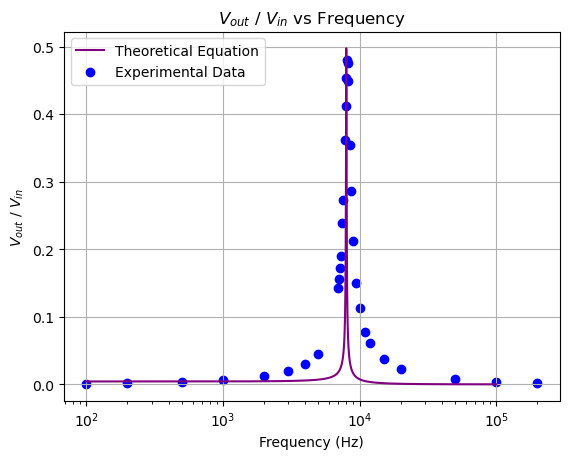

In [76]:
x_axis = df['Freq. In (Hz)']
y_axis = df['Vout/Vin']

plt.semilogx()

plt.plot(frequencies, voltage, color = 'purple', label = 'Theoretical Equation')
plt.scatter(x_axis, y_axis, color='blue', label = 'Experimental Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$V_{out}$ / $V_{in}$')
plt.title(r'$V_{out}$ / $V_{in}$ vs Frequency')
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('../Lab1_Admittance')

### Admittance Graph Questions:
- In part b of the LRC Lab writeup, does omega < omega_0, omega = omega_0 and omega > omega_0 refer to separate portions of the above graph?
- Do I need to graph those portions separately? I'm not exactly sure how I could graph omega = omega_0
- I thought that this graph was supposed to be the admittance, but instead I'm graphing Vout/Vin as we previously discussed in class. What should I call this graph and is just calling the Y-axis Vout/Vin acceptable?
- Using both a standard and log scaled x-axis results in the peak, though it is easier to see in the log scale. Which would you recommend that I use?
- On the Lab Writeup assignment, it says that I should make a graph of I(w) (so, current). Is that what this graph is supposed to be? Or do I need to create that in addition to this graph
- What is V_0? And beta?

### Answers:
- It means oscilloscope traces, just take pictures at each of these three cases
- Vout/Vin is proportional to I(w). Remember the equation V = IR, so the graph you made could be scaled by R. Vout/Vin helps to deal with attenuation issues
- Beta is R/2L, V_0 is just the input voltage (6 V for us)

### Phase Plot

In [ ]:
def phase_func(x):
    # Circuit parameters
    R = 51
    L = 0.022
    C = 1.8 * 10**-8
    
    # Break the formula down
    numerator = 2 * (R / (2 * L)) * x 
    f0 = (1 / np.sqrt(L * C)) / (2 * np.pi) # Resonant frequency
    denominator = f0**2 - x**2
    
    # Calculate base phase
    phase = np.arctan(numerator / denominator)
    
    # Apply conditions
    if x < 50000:
        return phase
    elif x > 50000:
        return phase - 180
    else:
        return 0
    

    
frequencies = np.linspace(100, 100000, 5000)
vector_phase_func = np.vectorize(phase_func)
phases = vector_phase_func(frequencies)

In [66]:
def phase_func(f):
    # Parameters
    R = 51
    L = 0.022
    C = 1.8e-8
    
    # Physics constants
    omega_0 = 1 / np.sqrt(L * C)
    beta = R / (2 * L)
    w = 2 * np.pi * f
    num = 2 * beta * w
    den = (omega_0**2) - (w**2)
    
    # Calculate the angle
    phase_rad = np.arctan2(num, den)
    
    # Shift down by 90 degrees to center it at 0 during resonance
    return np.degrees(phase_rad) - 90

frequencies = np.linspace(100, 100000, 5000)
vector_phase_func = np.vectorize(phase_func)
phases = vector_phase_func(frequencies)

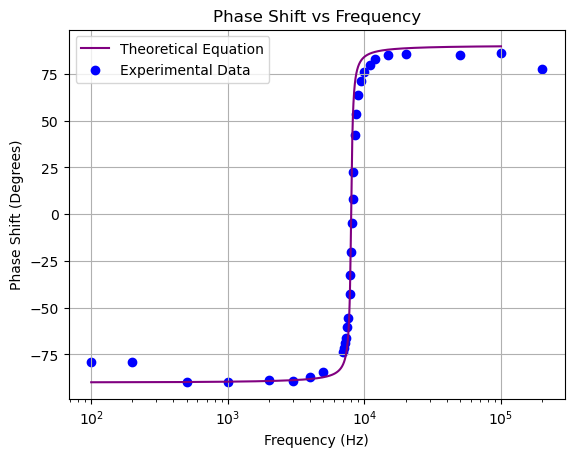

In [73]:
x_axis = df['Freq. In (Hz)']
y_axis = df['Phase Shift (Deg)']

plt.semilogx()

plt.plot(frequencies, phases, color = 'purple', label = 'Theoretical Equation')
plt.scatter(x_axis, y_axis, color='blue', label = 'Experimental Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Phase Shift (Degrees)')
plt.title('Phase Shift vs Frequency')
plt.grid(True)
plt.legend()
plt.savefig('../Lab1_Phase')

### Phase Shift Graph Questions:
- Should I change the degree symbol?
- I had to put frequency in the log scale, it's acceptable to simply mention this in the caption?

### Answers:
- You can write the word degrees or convert to radians

### General Questions:
- Do I need to plot the theoretical plots on the same graphs? What equations should I use for those?
- Should I graph these as points instead of lines and then create a line of best fit w a particular equation? I remember this is how we were required to do it in electronics. I don't think that it would be possible to generate a line of best fit for these graphs
- It doesn't seem like there was a good place that actually listed out the values of our resistor, capacitor, and inductor. What are those values/ where could I find the values? Were they listed in the previous HW?

### Answers:
- Graph theoretical plots on the same graphs
- Do graph these as points, the "line of best fit" will actually just be the theoretical curves
- Values are given on Jeff's slides